# **Machine Learning Handout** 
###  Alessandro Pranzo 3159045

## Introduction

Here we will implement two main classification algorithms, kNN and SVM for a classification problem of a dataset (composed of 1400 datapoints with 20 features each). The data is automatically generated and one of four labels can be assigned to each datapoint.

Note: No information about metadata and data sources is given hence there is no practical intuition behind data.

We start by importing all the necessary tools needed throughout the process.

In [185]:
#Major imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC, SVC
from scipy.stats import uniform

## Data preprocessing

We download the data and prepare them to be fed into the classifiers, taking a look at their first values.

### Data exploration

In [118]:
df = pd.read_csv("mldata_0003159045.csv")
print(df.shape)
df.head()

(1400, 22)


,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0,3,-1.869350,3.559079,-1.145611,-3.840056,0.627002,-1.486503,-1.116860,-0.501075,...,0.204709,-0.731950,-0.938675,2.816732,1.072657,2.367081,-1.187479,0.748156,-0.185988,0.226795
1,1,3,0.619341,2.486762,0.009735,-4.773803,-0.377366,1.428685,-0.278266,-0.674745,...,-1.420404,-1.188352,-0.840943,0.824977,1.991146,0.333274,2.879939,0.256975,0.074700,0.467322
2,2,2,5.821832,4.911420,1.803447,3.634988,0.038141,0.850619,-1.253547,0.490986,...,1.316830,-0.130740,-0.987596,-2.987699,2.098421,0.926776,-0.121936,-0.156706,0.131401,0.518553
3,3,2,1.076023,-3.296251,0.764935,-5.657998,-0.250583,1.352594,0.517906,-0.542137,...,-2.347694,0.018713,0.480454,1.733611,-0.397137,0.177095,1.015141,-0.012718,0.042500,-0.161039
4,4,3,0.231785,1.866774,-3.300366,-7.653516,-0.097803,-0.822568,0.894497,0.640398,...,0.512948,-0.421881,1.318767,-1.513659,0.855297,-0.219029,2.704655,-0.442440,-0.032237,0.096417


Hereby we can confirm the shape of the data: 1400 datapoints and 20 features, here 22 counting the indexes and labels (which are 4 as we can see from the following cell).

In [119]:
df["label"].unique()

array([3, 2, 1, 0])

We also take a look at the description of the data in order to understand roughly their distribution. 

In [120]:
df.describe()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,699.5000,1.480714,0.717343,0.528495,0.028657,-0.008994,-0.027702,0.121780,0.113305,0.076414,...,0.173745,-0.142779,0.027352,-0.492885,0.106520,0.139698,0.444864,0.048502,0.017547,0.100318
std,404.2895,1.104762,2.348130,3.124755,1.792042,6.383400,0.481900,1.187348,0.803036,0.923880,...,2.265375,1.010277,1.195219,2.360631,1.288370,1.140858,2.343031,0.412483,0.127287,1.119546
min,0.0000,0.000000,-7.023354,-9.951135,-6.282387,-23.267880,-1.545825,-5.015833,-3.001043,-3.177070,...,-7.172480,-3.387446,-5.482780,-7.846504,-4.038293,-3.728404,-7.693023,-1.394450,-0.455536,-3.670045
25%,349.7500,1.000000,-0.866371,-1.620745,-1.175103,-4.487222,-0.365906,-0.687716,-0.441010,-0.570926,...,-1.360553,-0.827322,-0.656273,-2.066851,-0.782531,-0.640120,-1.064708,-0.216123,-0.067654,-0.648519
50%,699.5000,1.000000,0.641637,0.608123,0.009671,-0.104565,-0.014860,0.157844,0.114960,0.071775,...,0.156540,-0.162254,0.034969,-0.592626,0.047029,0.105411,0.266358,0.044178,0.016816,0.085650
75%,1049.2500,2.000000,2.135757,2.527115,1.197216,4.363047,0.322528,0.874309,0.650354,0.730473,...,1.735518,0.554277,0.830831,0.970230,1.007300,0.924540,1.876943,0.317549,0.101601,0.873565
max,1399.0000,3.000000,8.700184,14.646834,6.122488,23.904006,1.349306,3.763556,2.856206,3.193338,...,8.387536,3.300346,3.700360,7.313998,4.096346,4.015861,8.337685,1.495295,0.482167,3.697693


In the dataset there is no missing data, hence there is no analysis to perform on missing values.

### Splitting the dataset

We proceed by splitting the dataset in train and test sets. The first will be used for training the models and perform cross validation techniques when needed, while the second is just used to evaluate the models once trained.

Taking a 30/70 split for test/train will give us a nice tradeoff between enough data for training and actual predictions for the test dataset (the exact dimension of the sets is printed below), leading us to a good underfitting/overfitting analysis.

Note: in the following randomized set split we use 12 as seed, one could use any number (or None) but the results, although pretty similar, could differ.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis = 1), df["label"], test_size = 0.30, random_state=12)

print( f"X_train size : {X_train.shape}   X_test size : {X_test.shape}    y_train size : {y_train.shape}    y_test size : {y_test.shape}")

X_train size : (980, 21)   X_test size : (420, 21)    y_train size : (980,)    y_test size : (420,)


We now scale the data with a Standard scaler in order to obtain 0 mean and variance 1, even though we won't always use this transformation in the notebook.

In [122]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_train_scaled

array([[-0.40563936, -0.31415178,  0.29535517, ..., -1.62205717,
         0.81001208, -0.57646075],
       [ 0.04100051, -1.31025862,  1.08264531, ...,  0.31157913,
         0.81451911, -0.21183581],
       [-1.54054395, -0.04592708,  0.28461386, ..., -0.60043172,
         1.46647481,  0.7163201 ],
       ...,
       [ 1.43217388, -0.01594573, -1.41610151, ..., -0.7112409 ,
        -0.3715822 ,  0.81392762],
       [ 1.38824209, -0.83995733,  0.78214168, ...,  0.37033806,
         2.04795835, -2.10813067],
       [ 1.41752995, -1.05059023,  2.38017457, ..., -2.45850131,
         0.09306738, -0.99355637]])

## Preliminary analysis on data composition

Performing some basic decomposition and plotting could help us grasp some visual insights on the data and give us some first intuitions.

The algorithms employed to accomplish this task are:
- PCA (Principal Component Analysis)
- T-SNE (T-distributed Stochastic Neighbor Embedding)

### 2d PCA
Strating from PCA we firstly analise the 2 features that best explain the variance of the data and we plot them in a 2d plot in order to eventually capture some insights.

Here raw data (not scaled) is used.

In [123]:
pca_2d = PCA(n_components= 2)
X_train_projected_2d = pca_2d.fit_transform(X_train)
pca_2d.explained_variance_ratio_.sum()


0.9997627601758048

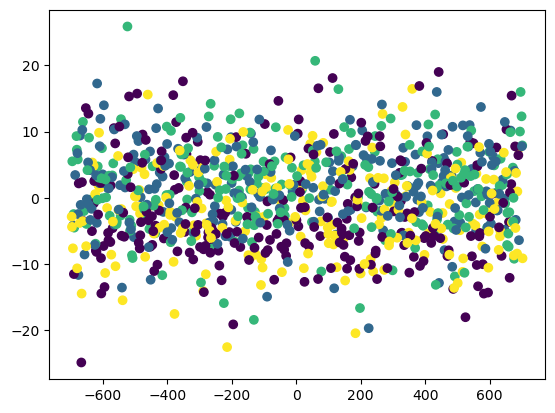

In [124]:
plt.scatter(X_train_projected_2d[:, 0], X_train_projected_2d[:, 1],  c=y_train)
plt.show()

The first 2 components find in this passage gave us almost 99% of variance explained (which is amazing given that the number of total features is 20) but from a visualisation perspective we cannot conclude anything useful. So we can now do the same on the scaled data.

In [168]:
pca_2d_scaled = PCA(n_components = 2)
X_train_scaled_projected_2d = pca_2d_scaled.fit_transform(X_train_scaled)
pca_2d_scaled.explained_variance_ratio_.sum()


0.2527013555825378

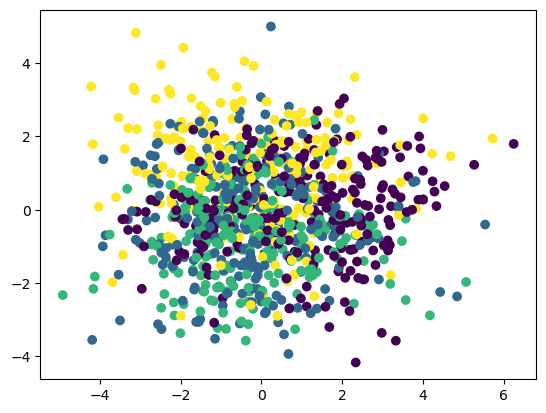

In [169]:
plt.scatter(X_train_scaled_projected_2d[:, 0], X_train_scaled_projected_2d[:, 1],  c=y_train)
plt.show()

PCA on scaled data gave us almost 25% of the variance of the data explained by the 2 dimensions. Also in this case the plotting of the projected data didn't give us any insight on the decision boundaries for the classification problem we are trying to solve.

### 3d PCA
Another dimension could be considered in our trial on visualisation approach, thus we apply 3d PCA and see the results.
On raw data first.

In [125]:
pca_3d = PCA(n_components= 3)
X_train_projected_3d = pca_3d.fit_transform(X_train)
pca_3d.explained_variance_ratio_.sum()

0.9998245184889899

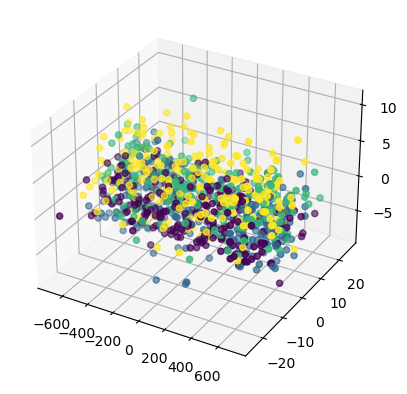

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_projected_3d[:, 0], X_train_projected_3d[:, 1], X_train_projected_3d[:, 2], c = y_train)

plt.show()

As it should be given the previous result, the variance explained by the 3 dimensions involved is over 99%. Once again from the plotting there is no insight to be extracted.

We do the same on the scaled data.

In [170]:
pca_3d_scaled = PCA(n_components= 3)
X_train_scaled_projected_3d = pca_3d_scaled.fit_transform(X_train_scaled)
pca_3d_scaled.explained_variance_ratio_.sum()

0.3302405930980089

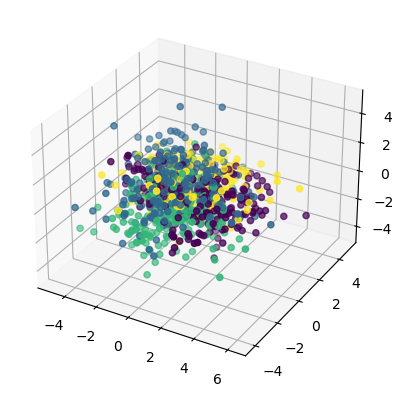

In [171]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_scaled_projected_3d[:, 0], X_train_scaled_projected_3d[:, 1], X_train_scaled_projected_3d[:, 2], c = y_train)

plt.show()

In accordance with the results obtained in the 2d case with the scaled data we found that the 3 dimensions just explain 33% of the total variance, furthermore once again the visualisation of projected data didn't give us any insight.

### 2d TSNE
We now employ another technique to try to visualise the decision boundaries before passing to more advanced methods.

Here is the result with raw data:

In [174]:
X_train_reduced_2d = TSNE(n_components=2 , learning_rate='auto', init='random', perplexity = 50).fit_transform(X_train)
X_train_reduced_2d.shape

(980, 2)

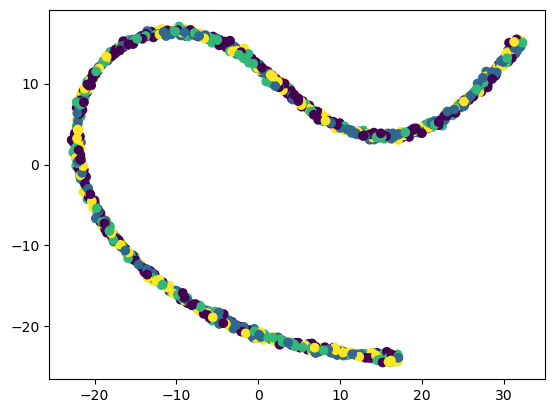

In [175]:
plt.scatter(X_train_reduced_2d[:, 0], X_train_reduced_2d[:, 1],  c=y_train)
plt.show()

plt.show()

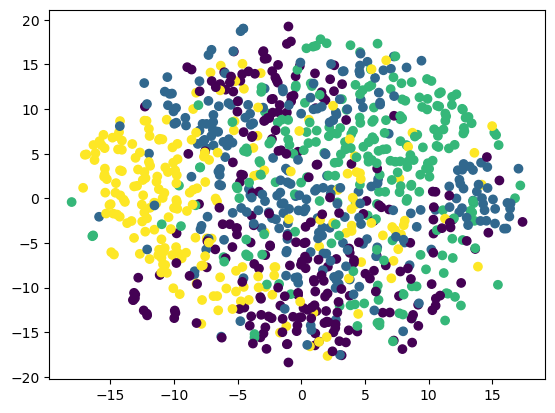

In [176]:
X_train_scaled_reduced_2d = TSNE(n_components=2 , learning_rate='auto', init='random', perplexity = 50).fit_transform(X_train_scaled)
plt.scatter(X_train_scaled_reduced_2d[:, 0], X_train_scaled_reduced_2d[:, 1],  c=y_train)
plt.show()

In neither representation we are capable of simply separate the data. 

### 3d TSNE

As a last attempt to gain information on the classification of the data only by looking at it, we use TSNE on 3 dimensions.

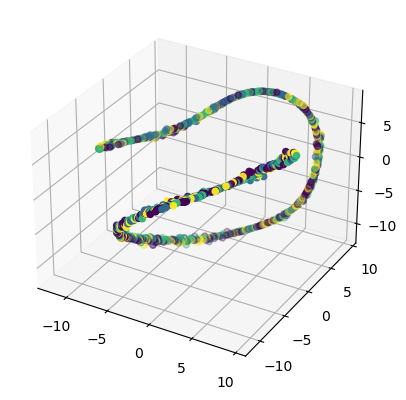

In [180]:
X_train_reduced_3d = TSNE(n_components=3 , learning_rate='auto', init='random', perplexity = 50).fit_transform(X_train)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_reduced_3d[:, 0], X_train_reduced_3d[:, 1], X_train_reduced_3d[:, 2], c = y_train)

plt.show()

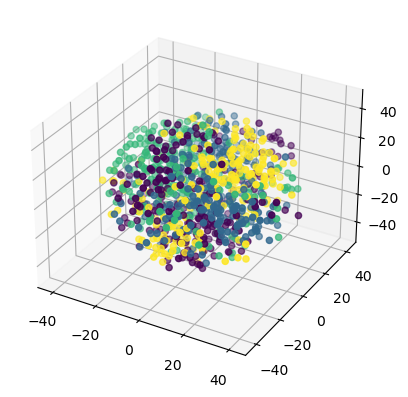

In [181]:
X_train_scaled_reduced_3d = TSNE(n_components=3 , learning_rate='auto', init='random', perplexity = 50).fit_transform(X_train_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_scaled_reduced_3d[:, 0], X_train_scaled_reduced_3d[:, 1], X_train_scaled_reduced_3d[:, 2], c = y_train)

plt.show()

Also with this technique there is no insight that can be extracted from visualisation (neither for the raw data nor for the scaled one).

## K-Nearest Neighbors

The task now moves onto using a very popular algorithm in order to solve this classification problem: kNN (k-Nearest Neighbors) algorithm. The conceptual fundation of this algorithm is a definition of _distance_ that best suits the data, for this purpose we use a canonical Euclidian distance (which is nice for numerical features). This choice of distance leads us to choose only the scaled data so that every dimension gives the same influence.

Please note that there is no need to use a reduced dimension of the dataset for 2 main reasons:
- The original dimension, even though is dimensionally high (20 features may seem too much) on the coputational point of view are not too demanding;
- As aforementioned the data we should use here are the scaled ones, which gave us a low value of variance explained (namely 33%) int the 3d PCA decomposition.

As a first implementation of the algorithm we use the default number of neighbors (n_neighbors) 5 which is also the same as the number of labels + 1 (which is intuitive, when voting there can't be a vote), we also give a uniform weight to every neighbor in the voting step.

In [130]:
knn_simple = Pipeline([
    ("scaler" , StandardScaler()),
     ("knn", KNeighborsClassifier()) #Where here the default number of neighbors is 5 (exactly the number of our labels + 1)
])

knn_simple_scores = cross_validate(knn_simple, X_train, y_train, scoring= "accuracy")
knn_simple_scores

{'fit_time': array([0.00630379, 0.01224804, 0.00624371, 0.00700402, 0.00518489]),
 'score_time': array([0.04898   , 0.03156877, 0.03766131, 0.02945614, 0.01409602]),
 'test_score': array([0.62755102, 0.61734694, 0.65306122, 0.60204082, 0.65816327])}

In [131]:
knn_simple_scores["test_score"].mean()

0.6316326530612244

Furthemore we can use cross validation to have an idea on the accuracy that the model would have on every chunk of data.

In [132]:
knn_simple.fit(X_train, y_train)
y_pred_simple = knn_simple.predict(X_test)
print(accuracy_score(y_test, y_pred_simple))

0.638095238095238


The accuracy obtained in the evaluation step (with the test dataset), once trained on the whole training set, is consistent with the result obtained earlier, suggesting that we fit the data correctly but still the model is too simple to describe the data (63% accuracy).

In [195]:
# A function to display the performace of a model on a testing dataset
def show_confusion_matrix(model, X_test, y_test, color = "b"):
    
    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]   

    if color == "b":
        cmap = plt.cm.Blues
    elif color == "g":
        cmap = plt.cm.Greens

    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            model,
            X_test,
            y_test,
            cmap=cmap,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

    plt.show()

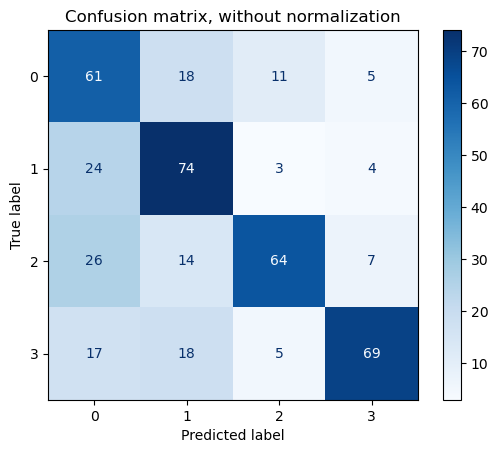

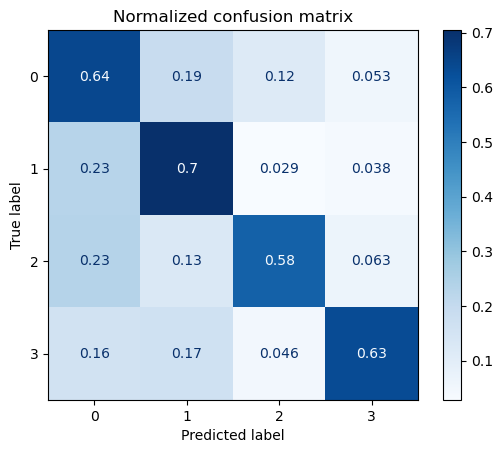

In [194]:
show_confusion_matrix(knn_simple, X_test, y_test)

The confusion matrices clarify the labels for which the simple model fails the most.

### Fine-Tuning for KNN Hyperparameters

Now we use GridSearch for the sake of finding the optimal values to give to the parameters (given the dataset). Among the set of all parameters we choose to take the number of neighbors between 1 and 98 (corresponding to 10% of the training data) and the type of weights between uniform (same voting weight for all neighbors) and distance (voting weight inversely proportional to the distance of the neighbors).

In [134]:
knn_pipeline = Pipeline([
    ("scaler" , StandardScaler()),
     ("knn", KNeighborsClassifier())
])


knn_param_grid ={ 
    "knn__n_neighbors" : range(1,98) ,
    "knn__weights" : ["uniform", "distance"]
}

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, scoring= "accuracy") #Accuracy is more suitable since we are doing classification
knn_grid_search.fit(X_train, y_train) #Here we use the raw data since scaling is performed in the pipeline itself

print("Best Hyperparameters: ", knn_grid_search.best_params_)
print("Best Accuracy: ", knn_grid_search.best_score_)

Best HyperParameters:  {'knn__n_neighbors': 48, 'knn__weights': 'distance'}
Best Accuracy:  0.7285714285714286


In [197]:
knn_optimal = knn_grid_search.best_estimator_
knn_optimal_accuracy = accuracy_score(y_test, knn_optimal.predict(X_test))
knn_optimal_accuracy

0.7142857142857143

After grid search cross validation we are given the best accuracy with an estimator with 48 neighbors for which we give a weight parameter of "distance". Which follows from intuition since in high dimensional spaces points tend to be more distant, hence when dealing with the 48 nearest points we can end up taking into account far points too.

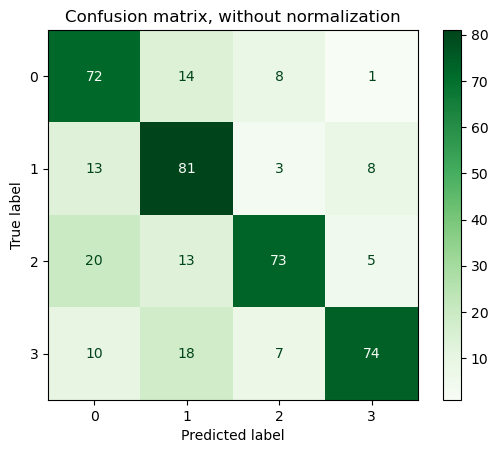

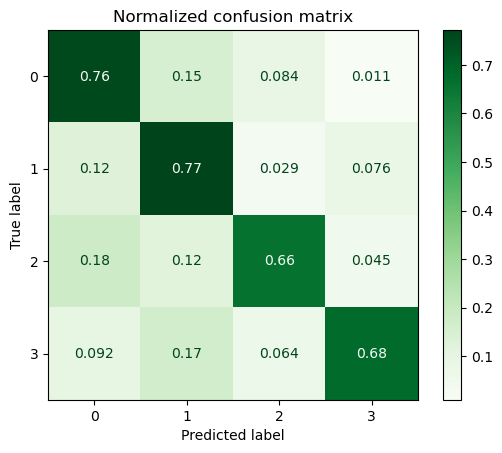

In [198]:
show_confusion_matrix(knn_optimal, X_test, y_test, color = "g")

From the above confusion matrices is clearer that the optimized model for KNN is better performing than the previous simple implementation of the model. (For almost all the entries of the not normalised confusion matrices the values for the optimal model are grater then the simple one on the diagonal and lower on the other entries, thus giving a better performance)

## Support Vector Machine with Linear Kernel

So far we achieved acceptable performance for this classification problem but now it is time to use SVMs (Support Vector Machines) with linear kernel in order to address the best algorithm to perform the task.

When using SVMs for multiclass classification problems we encounter the One-vs-Rest (OvR) approach for dealing with multiple labels. In this approach, each label is classified against all the others and eventually the one that obtains the best score is given as final.

The same reasons we mentioned above for not using the compressed data in kNN apply to SVMs.

### Implementation with raw data
We use the original data first and feed it directly in the model. So we create two different pipelines for the data that will be later evaluated.

In [140]:
svm_raw_simple = LinearSVC(max_iter = 60000) 
svm_raw_simple_scores = cross_validate(svm_raw_simple, X_train, y_train, scoring= "accuracy")
svm_raw_simple_scores

/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'fit_time': array([ 8.92685485,  9.00448895, 10.2450819 ,  9.24039197,  9.198668  ]),
 'score_time': array([0.00225115, 0.00244474, 0.00246716, 0.00180387, 0.00175405]),
 'test_score': array([0.51020408, 0.66836735, 0.48979592, 0.46938776, 0.62244898])}

In [141]:
svm_raw_simple_scores["test_score"].mean()

0.5520408163265306

In [142]:
svm_raw_simple.fit(X_train, y_train)
accuracy_score(y_test, svm_raw_simple.predict(X_test))

/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5238095238095238

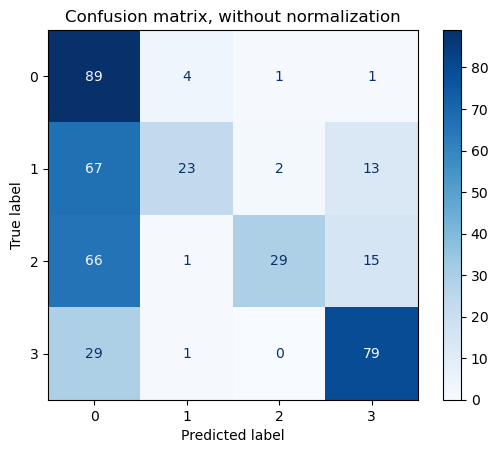

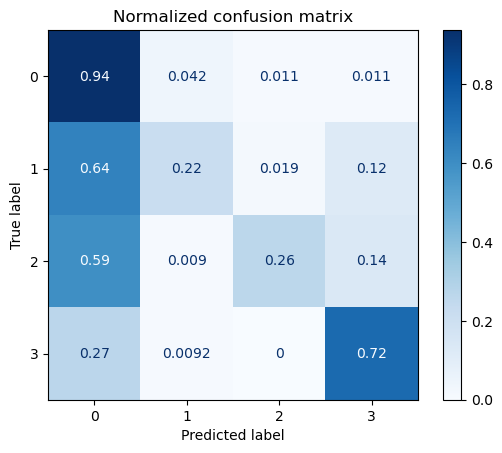

In [199]:
show_confusion_matrix(svm_raw_simple, X_test, y_test)

### Fine-Tuning SVMs with Linear Kernel

Watch out that "hinge" loss cannot be used when the dual = False (neither with "l1" nor with "l2"), hence the space of hyperparameters pins down to just choosing l1 and l2 penalty with "squared_hinge" loss on a given interval for C (the regularization parameter).

In [144]:
# Watch out here!!! The l1 penalty and the hinge penalty cannot be used simultaneously so we split the search in two (search1 with hinge vs squared_hinge)
# Furthermore we choose ovr for the multiclass attribute to the end of easing the computation
svm_param_grid = {
    "penalty" : ["l1", "l2"],
    "C" : uniform(1.0, 10)     #We arrive up to 10 in order to have margins large enough !!!
}

svm_grid_search = RandomizedSearchCV(LinearSVC(loss = "squared_hinge", dual = False, max_iter= 30000), svm_param_grid, n_iter = 50, scoring = "accuracy") #Here we put False as value for the dual since our dataset is composed of an higher number of samples (1256 in the training set) vs the number of features (20)
svm_grid_search.fit(X_train, y_train)

print(f"Best HyperParameters: {svm_grid_search.best_params_}")
print(f"Best Accuracy: {svm_grid_search.best_score_}")

Best HyperParameters: {'C': 1.4126663414054255, 'penalty': 'l1'}
Best Accuracy: 0.729591836734694


In [201]:
svm_raw_final = svm_grid_search.best_estimator_
svm_raw_final_accuracy = accuracy_score(y_train, svm_raw_final.predict(X_train))
svm_raw_final_accuracy

0.7561224489795918

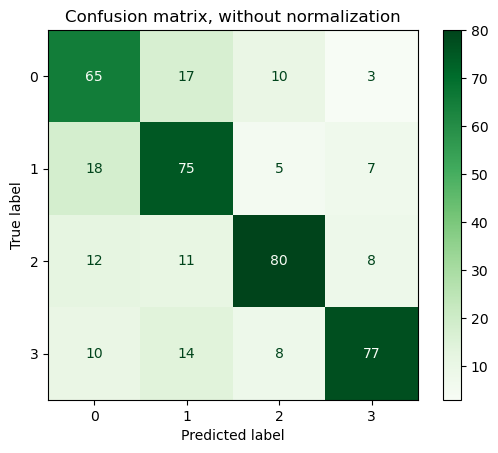

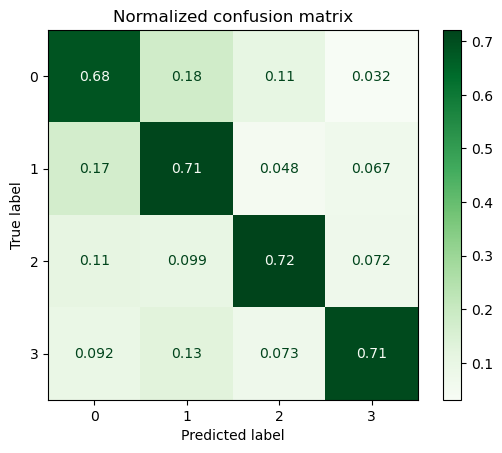

In [202]:
show_confusion_matrix(svm_raw_final, X_test, y_test, color = "g")

### Implementation with scaled data

We now perform the same algorithm as above but firstly we scale the data before feeding it into the machine.

In [147]:
svm_scaled_simple = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(max_iter = 60000) )
]) 

svm_scaled_simple_scores = cross_validate(svm_scaled_simple, X_train, y_train, scoring= "accuracy")
svm_scaled_simple_scores

{'fit_time': array([0.22484612, 0.22607279, 0.25300789, 0.21016502, 0.24444985]),
 'score_time': array([0.00180387, 0.00293493, 0.00185823, 0.00176477, 0.00273013]),
 'test_score': array([0.71938776, 0.7244898 , 0.70918367, 0.74489796, 0.73469388])}

In [148]:
svm_scaled_simple_scores["test_score"].mean()

0.726530612244898

In [149]:
svm_scaled_simple.fit(X_train, y_train)
accuracy_score(y_test, svm_scaled_simple.predict(X_test))

0.7071428571428572

Confusion matrix, without normalization
[[64 17 11  3]
 [18 75  5  7]
 [12 10 81  8]
 [10 13  9 77]]
Normalized confusion matrix
[[0.67368421 0.17894737 0.11578947 0.03157895]
 [0.17142857 0.71428571 0.04761905 0.06666667]
 [0.10810811 0.09009009 0.72972973 0.07207207]
 [0.09174312 0.11926606 0.08256881 0.70642202]]


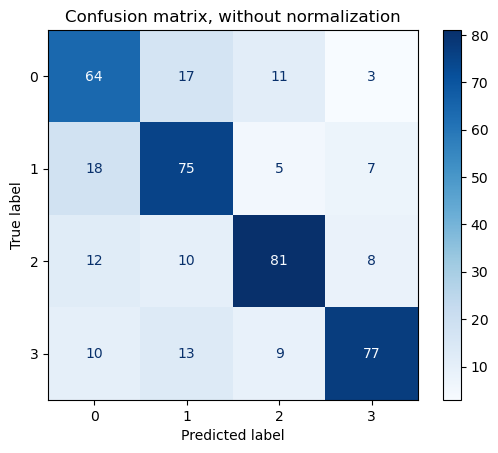

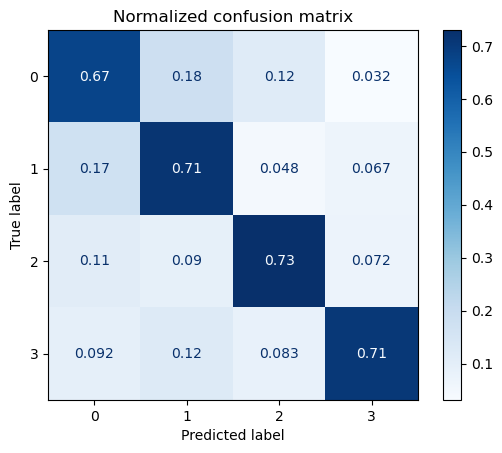

In [150]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final_2:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm_scaled_simple,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [151]:
scaled_svm_pipeline = Pipeline([ 
    ("scaler" , StandardScaler()), 
    ("svm" , LinearSVC(loss = "squared_hinge", dual = False, max_iter= 30000))
])

scaled_svm_param_grid = {
    "svm__penalty" : ["l1", "l2"],
    "svm__C" : uniform(1.0, 10)     #We arrive up to 10 in order to have margins large enough !!!
}

scaled_svm_grid_search = RandomizedSearchCV(scaled_svm_pipeline, scaled_svm_param_grid, n_iter = 50, scoring= "accuracy")
scaled_svm_grid_search.fit(X_train, y_train)

print(f"Best HyperParameters: {scaled_svm_grid_search.best_params_}")
print(f"Best Accuracy: {scaled_svm_grid_search.best_score_}")

Best HyperParameters: {'svm__C': 7.567217560246057, 'svm__penalty': 'l1'}
Best Accuracy: 0.726530612244898


In [152]:
scaled_svm_final = scaled_svm_grid_search.best_estimator_
scaled_svm_final_accuracy = accuracy_score(y_test, scaled_svm_final.predict(X_test))
scaled_svm_final_accuracy

0.7071428571428572

Confusion matrix, without normalization
[[64 17 11  3]
 [18 75  5  7]
 [12 10 81  8]
 [10 13  9 77]]
Normalized confusion matrix
[[0.67368421 0.17894737 0.11578947 0.03157895]
 [0.17142857 0.71428571 0.04761905 0.06666667]
 [0.10810811 0.09009009 0.72972973 0.07207207]
 [0.09174312 0.11926606 0.08256881 0.70642202]]


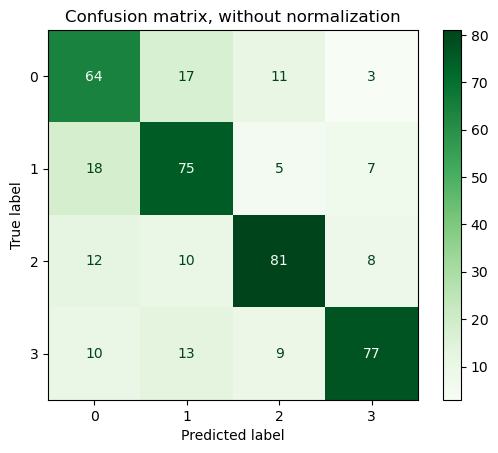

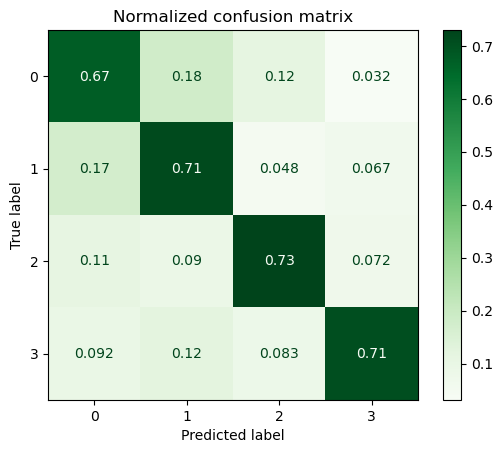

In [153]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final_2:
    disp = ConfusionMatrixDisplay.from_estimator(
        scaled_svm_final,
        X_test,
        y_test,
        cmap=plt.cm.Greens,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Support Vector Machines with non-linear Kernels

Due to the poor accuracy obtained with the previous models we now explore new models in order to obtain a better performance on the test set.


In [154]:
rbf_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))
])

rbf_svm_scores = cross_validate(rbf_svm, X_train, y_train, scoring = "accuracy")
rbf_svm_scores

{'fit_time': array([0.045048  , 0.03432894, 0.03276396, 0.03255701, 0.03425694]),
 'score_time': array([0.01822329, 0.01616597, 0.0159328 , 0.01588798, 0.01591086]),
 'test_score': array([0.74489796, 0.75      , 0.75      , 0.73979592, 0.77040816])}

In [155]:
rbf_svm_scores["test_score"].mean()

0.7510204081632654

In [156]:
rbf_svm.fit(X_train, y_train)
accuracy_score(y_test, rbf_svm.predict(X_test))

0.7666666666666667

Confusion matrix, without normalization
[[78  9  7  1]
 [15 83  4  3]
 [12 14 82  3]
 [10 14  6 79]]
Normalized confusion matrix
[[0.82105263 0.09473684 0.07368421 0.01052632]
 [0.14285714 0.79047619 0.03809524 0.02857143]
 [0.10810811 0.12612613 0.73873874 0.02702703]
 [0.09174312 0.12844037 0.05504587 0.72477064]]


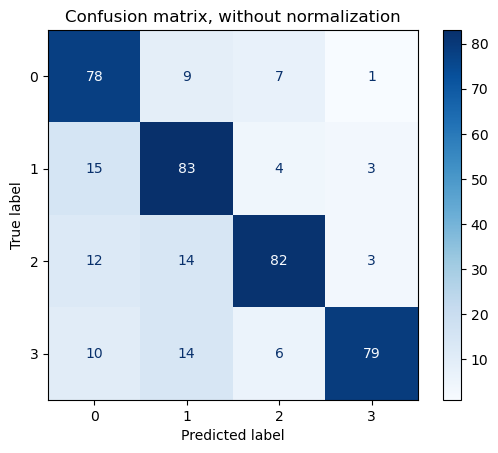

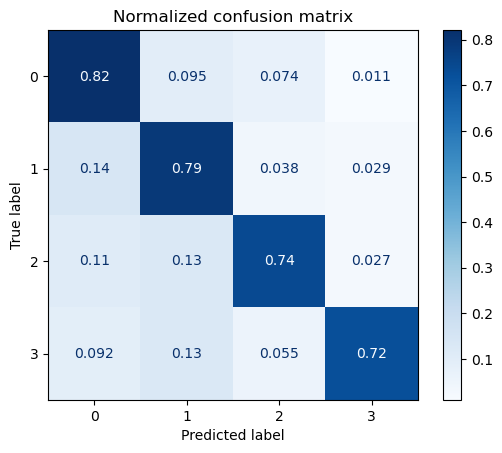

In [157]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final_2:
    disp = ConfusionMatrixDisplay.from_estimator(
        rbf_svm,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [158]:
nonlin_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(gamma = "auto")) # gamma isn't "scale" since data is already scaled, hence their variance is 1 so "auto" = "scale"
])

nonlin_svm_paramters = {
    "svm__C" : uniform(0.1, 2),
    "svm__kernel" : ["rbf", "poly", "sigmoid"],
}

nonlin_svm_grid_search = RandomizedSearchCV(nonlin_svm, nonlin_svm_paramters, n_iter= 100, scoring = "accuracy")
nonlin_svm_grid_search.fit(X_train, y_train)

print(f"Best HyperParameters: {nonlin_svm_grid_search.best_params_}")
print(f"Best Accuracy: {nonlin_svm_grid_search.best_score_}")

Best HyperParameters: {'svm__C': 1.7270790107953242, 'svm__kernel': 'rbf'}
Best Accuracy: 0.7571428571428572


In [159]:
svm_final = nonlin_svm_grid_search.best_estimator_
svm_final_accuracy = accuracy_score(y_test, svm_final.predict(X_test))
svm_final_accuracy

0.7690476190476191

Confusion matrix, without normalization
[[76 10  8  1]
 [12 87  2  4]
 [12 13 81  5]
 [10 14  6 79]]
Normalized confusion matrix
[[0.8        0.10526316 0.08421053 0.01052632]
 [0.11428571 0.82857143 0.01904762 0.03809524]
 [0.10810811 0.11711712 0.72972973 0.04504505]
 [0.09174312 0.12844037 0.05504587 0.72477064]]


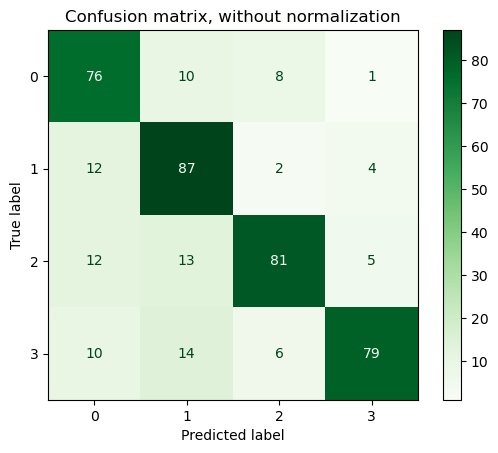

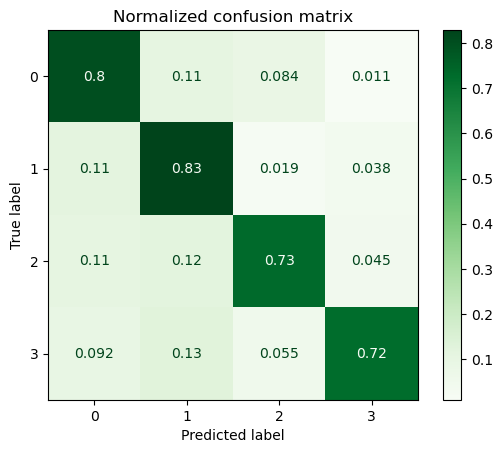

In [160]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final_2:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm_final,
        X_test,
        y_test,
        cmap=plt.cm.Greens,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Model Selection

We now use different metrics to evaluate all the models we developed and choose the best describes the problem

In [161]:
#This function returns respectively the accuracy, precision and recall of a selected model

def model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average = "macro"), recall_score(y_test, y_pred, average = "macro"))


#This function plots a group bar graph with the metrics of different models 
def show_metrics(models, models_names, scores):
    
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(models))
    width = 0.30
    i = 0

    for metric, value in scores.items():
        offset = width * i 
        rect = ax.bar(x + offset, value, label = metric, width= width)
        ax.bar_label(rect, fmt = "%.2f", padding = 3 )
        i += 1

    ax.set_ylabel("Score (from 0 to 1)")
    ax.set_xlabel("Models")
    ax.set_title("Accuracy, Precision, Recall scores for differnt models")
    ax.set_xticks(x + width, models_names)
    ax.legend(loc = "lower left")

    plt.show()

In [162]:
models = [knn_optimal, knn_final_2, svm_raw_final, scaled_svm_final, svm_final]
models_names = ["60-nn", "19-nn", "raw lin SVM", "scaled lin SVM", "rbf SVM"]

scores = {
    "Accuracy" : [model_metrics(model,X_test, y_test)[0] for model in models],
    "Precision" : [model_metrics(model, X_test, y_test)[1] for model in models],
    "Recall": [model_metrics(model, X_test, y_test)[2] for model in models]
}

scores_df = pd.DataFrame( {"Model name" : models_names, "Models" : models} | scores)
scores_df

,Model name,Models,Accuracy,Precision,Recall
0,60-nn,"(StandardScaler(), KNeighborsClassifier(n_neig...",0.714286,0.728013,0.716470
1,19-nn,"(StandardScaler(), KNeighborsClassifier(n_neig...",0.690476,0.699094,0.691876
2,raw lin SVM,"LinearSVC(C=1.4126663414054255, dual=False, ma...",0.707143,0.711825,0.706410
3,scaled lin SVM,"(StandardScaler(), LinearSVC(C=7.5672175602460...",0.707143,0.710559,0.706030
4,rbf SVM,"(StandardScaler(), SVC(C=1.7270790107953242, g...",0.769048,0.778803,0.770768


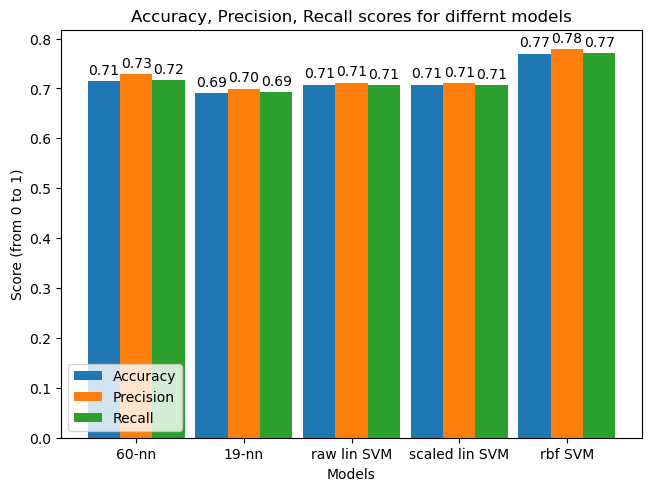

In [163]:
show_metrics(models,models_names, scores)